 #                    Haberman Analysis

# Dataset Introduction

* Haberman's Survival Dataset 
    contains data from the survival study of patients who had undergone surgery for breast cancer. The data was collected between 1958 and 1969.

* Columns in the Dataset

    1. Age: The age of the patient at the time of the operation.
    2. Year of Operation: The year when the operation was performed, ranging from 1958 to 1969.
    3. Positive Axillary Nodes Detected: The number of positive axillary lymph nodes detected (those that contain cancer).
    4. Survival Status:
    . The patient survived 5 years or more after the operation.
    . The patient died within 5 years after the operation.
* Data Coverage
    The dataset covers patient data from 1958 to 1969.


Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\PC\Desktop\Python Case studies\Haberman Case Study\haberman.csv")

In [5]:
df.columns= ['Age','Year','Nodes','Survival']

In [6]:
df.columns

Index(['Age', 'Year', 'Nodes', 'Survival'], dtype='object')

In [7]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# AGENDA :


Given a patient with the some Age, Year of operation and number of Lymph nodes detected, we have to predict or conclude the chances whether the patient will live less then 5 years of more the 5 years.

In [9]:
df.shape

(305, 4)

In [10]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [11]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

we will not remove the duplicates, as these can be a genuve possibility.

In [12]:
df['Survival'].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [13]:
df = df.replace([1,2],[0,1])

In [14]:
df['Survival'].value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [15]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


min(age) = 30 , max(age)  = 83, year = [1958,1969], nodes=[0,52], survival =[0,1]
* Nodes have Higher count Density between 0 and 4 (75% percentile)


## Haberman Univariate Analysis

1. Survival


In [16]:
df['Survival'].value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [18]:
df.Survival.value_counts(1)

# There are only 27% people who will e living less then 5 years, which means the dataset is imbalanced.

Survival
0    0.734426
1    0.265574
Name: proportion, dtype: float64

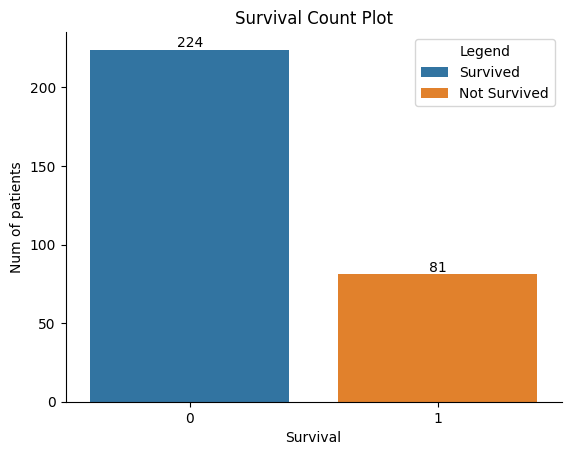

In [66]:
sns.countplot(x='Survival', data= df,palette=['#1f77b4', '#ff7f0e'])
plt.title('Survival Count Plot')
plt.ylabel('Num of patients')

# for p in plt.gca().patches:
#     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width()/2.,p.get_height()),
#                        ha = 'center',va='baseline',fontsize = 12,color = 'black', xytext=(0,5),
#                        textcoords='offset points')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['Survived', 'Not Survived'], title='Legend', loc='upper right')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

2. Age

In [33]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


Text(0, 0.5, 'Num of Patients')

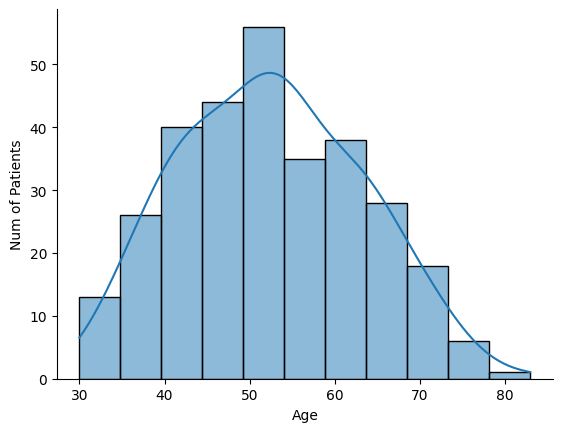

In [44]:
print(df.Age.skew())

sns.histplot(x = 'Age',data = df, kde = True, binwidth=5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Num of Patients')

In [45]:
# The maximum people who were opereated where in the age group 50 to 55.

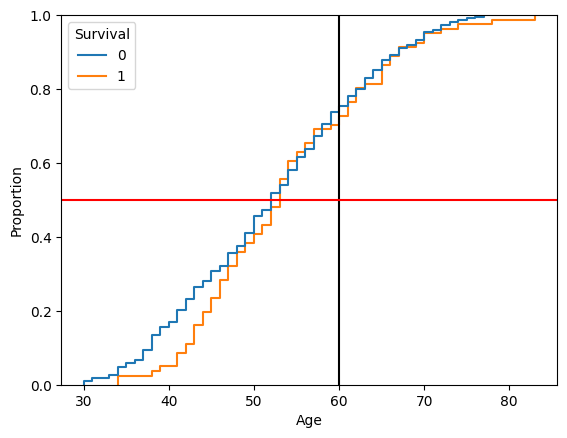

In [50]:
sns.ecdfplot(data= df , x='Age', hue = 'Survival')
plt.axvline(60,c='black')
plt.axhline(0.5,c='red')

In [51]:
# 80% of the people where 65 years or below.
# 50% of the people were 55 years or below.

3. Operaton Year

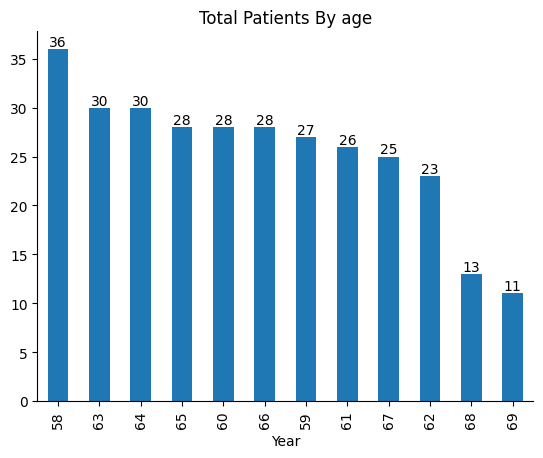

In [59]:
df.Year.value_counts().plot(kind='bar',)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Total Patients By age')
ax.bar_label(ax.containers[0])
plt.show()

4. Lymph nodes

In [67]:
df.Nodes.describe()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

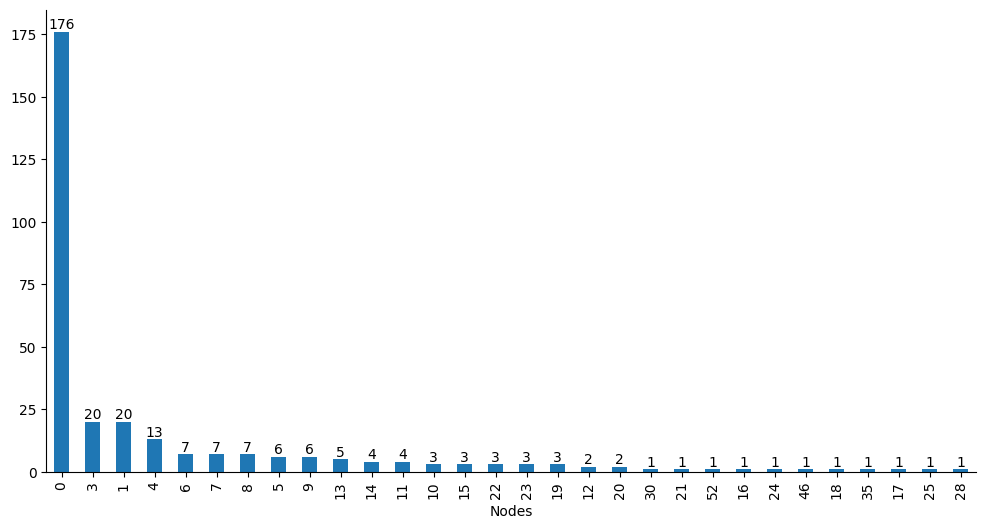

In [73]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar_label(ax.containers[0])
plt.show()

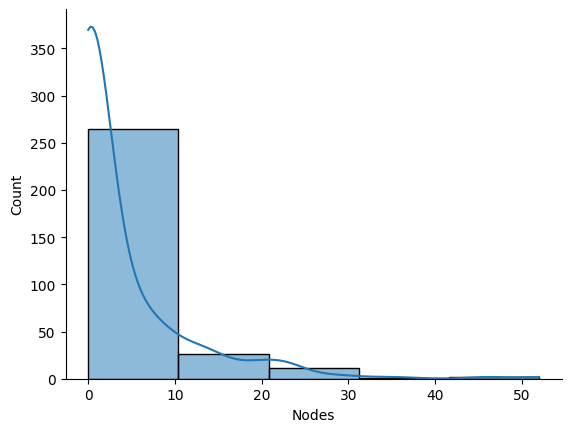

In [77]:
sns.histplot(x = 'Nodes',data = df, kde = True, binwidth=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [78]:
# Maximum density counts for nodes is between 0 and 10.

# Bivariate Analysis

In [79]:
# Age-Survival
# Age-Nodes-Survival
# Nodes-Survival
# Age-Nodes
# Years-Nodes
# Age-Years

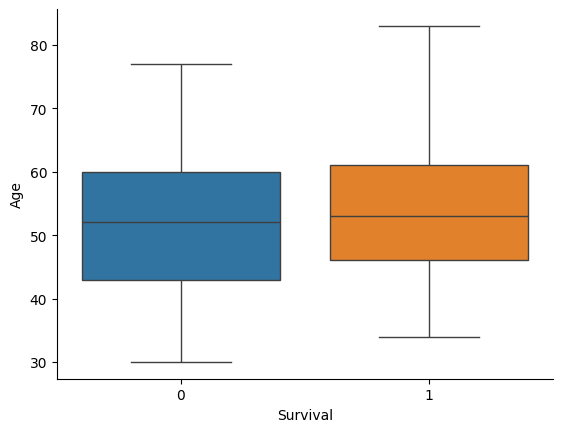

In [83]:
sns.boxplot(data=df,x='Survival', y='Age',palette=['#1f77b4', '#ff7f0e'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [85]:
# Pople with age > 77 will actually live lesser then 5 years
# Pople with age < 35 will actually live more then 5 years

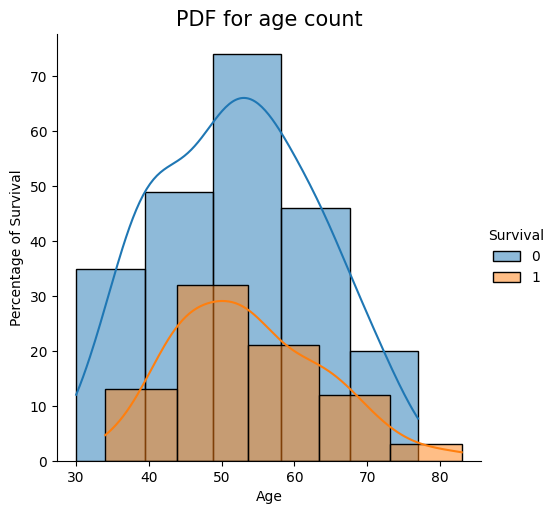

In [105]:
sns.FacetGrid(data = df, hue="Survival",height=5).map(sns.histplot,'Age',kde=True,bins =5).add_legend()
plt.xlabel('Age')
plt.ylabel('Percentage of Survival')
plt.title('PDF for age count',size= 15)
plt.show()

- Maximum percentage of people living lesser then 5 year asre between 43 to 53.
- People between 30-33 are living more then 5 yeara
- Pople with age > 77 will actually live lesser then 5 years

In [100]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
43    4
54    4
52    4
46    4
65    4
47    3
41    3
44    3
48    3
57    3
62    3
61    3
45    3
34    2
42    2
55    2
70    2
49    2
50    2
56    2
60    2
67    2
66    2
51    2
39    1
83    1
59    1
63    1
69    1
78    1
74    1
38    1
72    1
40    0
37    0
33    0
35    0
36    0
30    0
31    0
58    0
71    0
64    0
68    0
75    0
73    0
77    0
76    0
Name: Survival, dtype: int64

In [103]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
43    11
57    11
53    11
47    11
41    10
38    10
65    10
55    10
49    10
42     9
45     9
61     9
63     8
59     8
34     7
44     7
46     7
58     7
62     7
56     7
70     7
48     7
60     6
51     6
67     6
39     6
37     6
64     5
66     5
69     4
72     4
40     3
35     2
36     2
30     2
33     2
31     2
68     2
74     2
73     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

<Figure size 1200x1200 with 0 Axes>

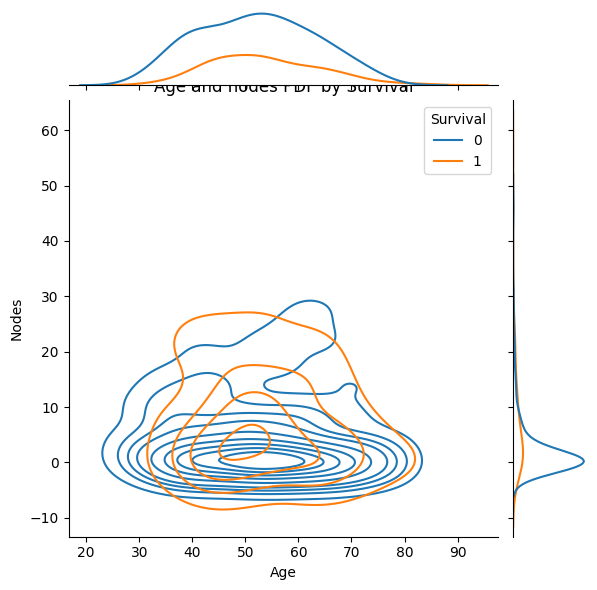

In [114]:
plt.figure(figsize=(12,12))
sns.jointplot(x='Age',y='Nodes',data = df,hue='Survival',kind='kde' )
plt.title('Age and nodes PDF by Survival')
plt.show()

- Age[34,53] and Nodes [10-52] will live lesser then 5 years

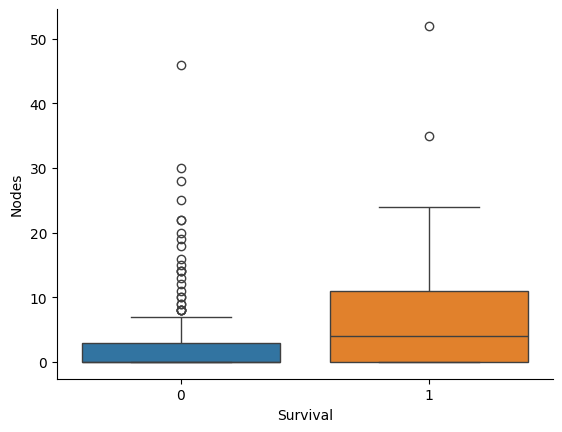

In [115]:
sns.boxplot(data=df,x='Survival', y='Nodes',palette=['#1f77b4', '#ff7f0e'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

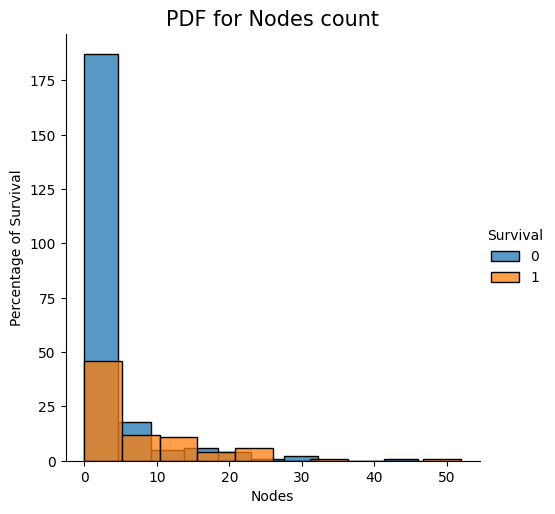

In [118]:
sns.FacetGrid(data = df, hue="Survival",height=5).map(sns.histplot,'Nodes',bins =10).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Nodes count',size= 15)
plt.show()


In [120]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
5      4
13     4
9      4
6      3
4      3
11     3
23     3
8      2
19     2
15     2
7      2
14     1
12     1
10     1
20     1
21     1
22     1
24     1
17     1
52     1
35     1
16     0
18     0
28     0
25     0
30     0
46     0
Name: Survival, dtype: int64

In [122]:
df.Nodes.value_counts().sort_values(ascending=False)

Nodes
0     176
3      20
1      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
22      3
23      3
19      3
12      2
20      2
30      1
21      1
52      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

In [ ]:
# 0-15%
# 1-25%
# 3-35%
# 4-23%
# 5-67%
# 6-43%
# 7-29%
# 8-29%
# 9-67%
# 10-33%

# 13-80%
# 23-100%


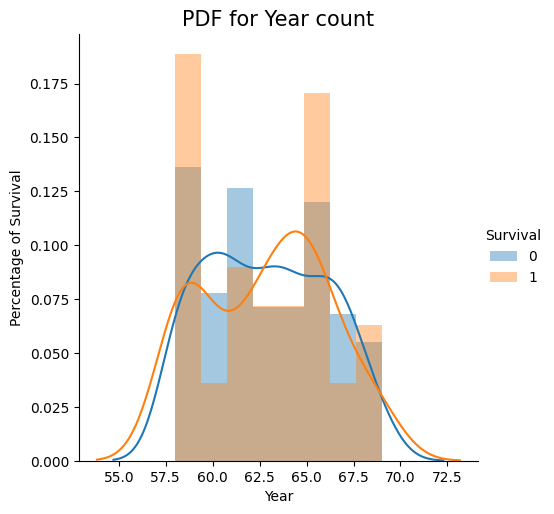

In [130]:
sns.FacetGrid(data = df, hue="Survival",height=5).map(sns.distplot,'Year',kde = True,bins =8).add_legend()
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year count',size= 15)
plt.show()


In [126]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


- 1965 - 46% 
- 1958 - 33%
- 1559 - 45%
- 33% people died before 5 years when operated between 1965,66

<Figure size 1200x1200 with 0 Axes>

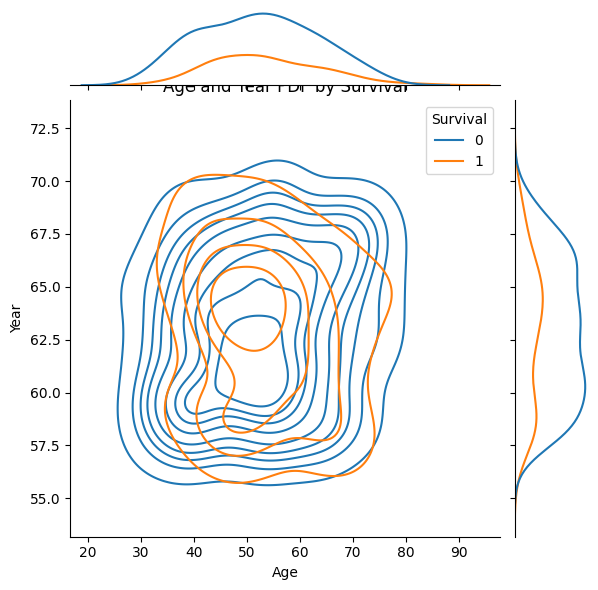

In [131]:
plt.figure(figsize=(12,12))
sns.jointplot(x='Age',y='Year',data = df,hue='Survival',kind='kde' )
plt.title('Age and Year PDF by Survival')
plt.show()

# Multivariate Analysis

In [138]:
# corrilation of dataframe
corr=df.corr()
corr

,Age,Year,Nodes,Survival
Age,1.000000,0.092623,-0.064772,0.064351
Year,0.092623,1.000000,0.003971,-0.004076
Nodes,-0.064772,0.003971,1.000000,0.285862
Survival,0.064351,-0.004076,0.285862,1.000000


<Axes: >

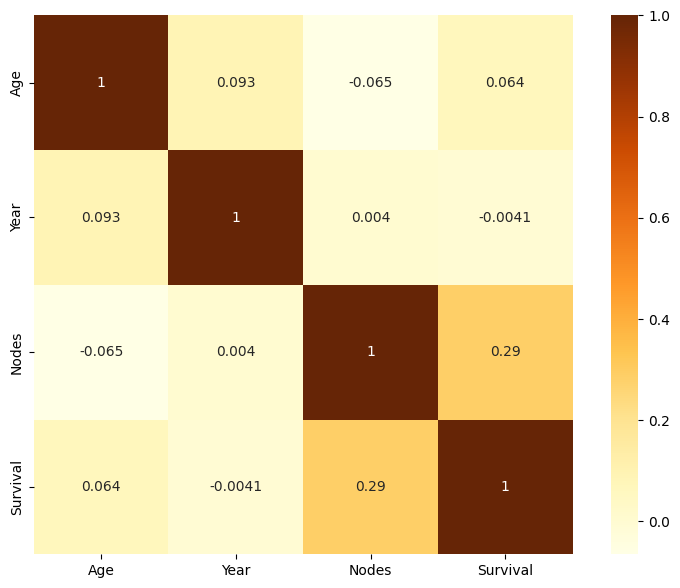

In [152]:
plt.figure(figsize=(10,7))

sns.heatmap(corr, annot=True, cmap='YlOrBr', square=True)

- Nodes and survival are corelated by 29%

# Some Additions Analysis

- What is the relationship between age and survival status?

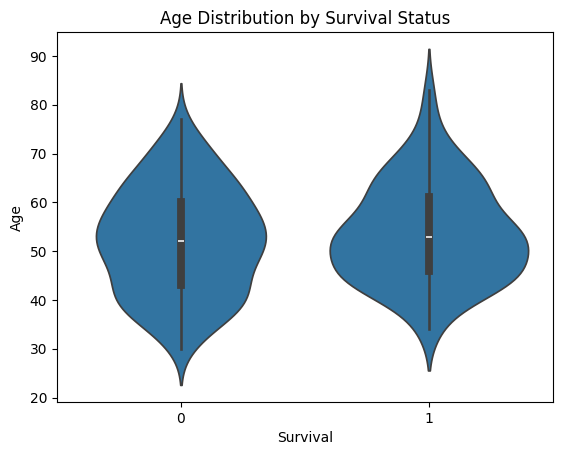

In [154]:
sns.violinplot(x='Survival', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()


The age distribution of those who did not survive is more spread out, with a higher density in the 60 - 70 range.

- Is there any correlation between age and the number of positive axillary nodes?

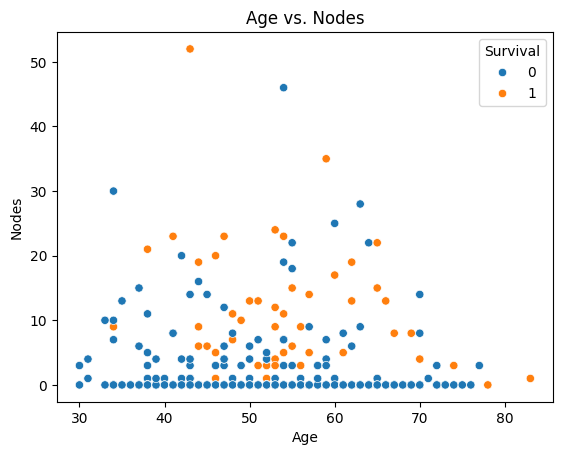

Correlation between Age and Nodes: -0.06


In [157]:
sns.scatterplot(x='Age', y='Nodes', hue='Survival', data=df)
plt.title('Age vs. Nodes')
plt.show()

# Correlation
corr = df['Age'].corr(df['Nodes'])
print(f'Correlation between Age and Nodes: {corr:.2f}')


- What is the survival rate for patients within different age groups (e.g., <40, 40-60, >60)? 

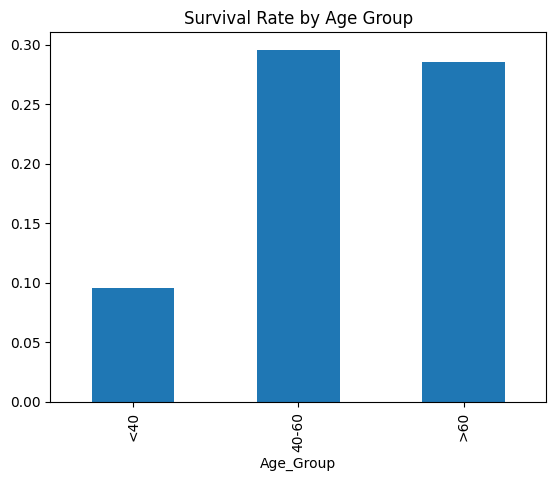

In [159]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '>60'])
survival_rate = df.groupby('Age_Group')['Survival'].mean()
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.show()


- Age Groups: Identifying at-risk age groups could help in designing preventive measures or special care.

` Does the survival rate vary depending on the year of operation?

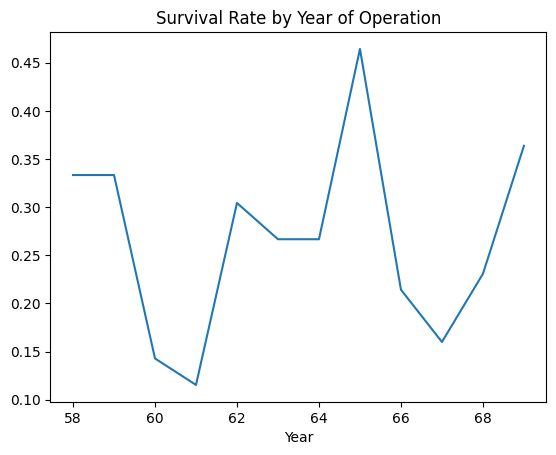

In [160]:
survival_rate_by_year = df.groupby('Year')['Survival'].mean()
survival_rate_by_year.plot(kind='line')
plt.title('Survival Rate by Year of Operation')
plt.show()


Year of Operation: If survival rates improve over time, this might reflect advancements in medical care and treatment strategies.

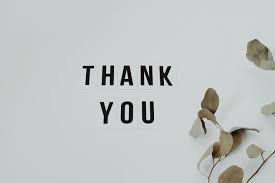